<a href="https://colab.research.google.com/github/SiriN1234/Python_Learning_google_colab/blob/main/Chapter_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

출처 : 혼자 공부하는 머신러닝+딥러닝

# 인공신경망

- 등장시기 : 1943년 즈음 등장
- 1차 융성시기 ~ 1960년대 후반
  + 로봇이 인간들과 함께 살 것이다 예언
  + xor 문제를 해결 못함
  + AI 연구의 겨울이 찾아옴
  + 대안 : 최근접이웃, 결정트리, 서포트벡터머신 등등
  + 토론토 대학 AI 연구소 (역전파 알고리즘 개발)
  + CNN 알고리즘 등장 (1980년대 후반에 활용)

- 2차 융성시기 ~ 1990년대 후반
  + CNN, RNN 알고리즘 등장
  + 연산 속도 문제 / 정확도 문제
  + 산업계 즉시 활용 어려움

- 3차 융성시기 2012 ~ 현재까지
  + GPU 세팅 (그래픽카드)
  + 연산속도문제 해결
  + 이세돌 vs 알바고 바둑 대회를 이후로 많이 알려짐 (2017년)
  + 정부에서도 본격적으로 투자
  + 사람이 없으니 교육쪽으로 먼저 투자 시작
  + 대학교육 + 국비교육
  + 데이터 과학

- 2012년 구글 / 아마존
- CNN 알고리즘 논문 다수 출현
- 이미지 기본 데이터셋
- 1) 기존대비 성능이 좋아야 함
- 2) 기존대비 연산속도가 좋아야 함
- -> 각자 딥러닝에 관심이 생김
- -> 공부하는 패턴 : 최우선 순위는 가장 최근 나온 알고리즘

### 분야가 정말 많음

- 지도학습 : 분류 / 수치 예측(회귀) / 비지도학습
  + 엑셀데이터 (정형데이터)
  + 기초 통계가 중요 (리포트 형태가 더 중요)
  + 개발의 상대적 중요성 떨어짐 (성과 측면)

- 딥러닝 : 비정형데이터

  + 기초통계의 의기마 거의 없음
  + 개발이 매우 중요 (C, C++, C#)
  + 웹앱 (안드로이드, iOS)
  + 텍스트, 음성, 이미지, 영상
  + 주로 쓰이는 알고리즘 탐색 (최신 알고리즘)
  + 계속 업그레이드 되고 있음

# 패션 MNIST

# 딥러닝 라이브러리

- 텐서플로 : https://www.tensorflow.org/
  + 2016 텐서플로 1버전 vs 텐서플로 2버전
  + 문법적으로 매우 다름
  + 산업용
- 파이토치 : https://pytorch.org/
  + 연구용

In [ ]:
import tensorflow
print(tensorflow.__version__)

2.8.0


# 데이터 불러오기

In [ ]:
from tensorflow import keras
(train_input, train_target), (test_input, test_target) =\
 keras.datasets.fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


- 데이터 확인
  + 60,000 이밎, 이미지 크기는 28 x 28

In [ ]:
print(train_input.shape, train_target.shape)
print(test_input.shape, test_target.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


- 이미지 시각화

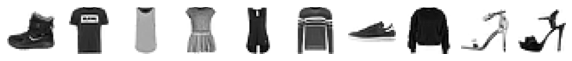

In [ ]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 10, figsize = (10, 10))
for i in range(10) :
  axs[i].imshow(train_input[i], cmap = 'gray_r')
  axs[i].axis('off')

plt.show()

- 타겟 값 리스트 확인

In [ ]:
print([train_target[i] for i in range(10)])

[9, 0, 0, 3, 0, 2, 7, 2, 5, 5]


- 실제 타겟값의 값을 확인
- 각 라벨당 6000개의 이미지 존재

In [ ]:
import numpy as np
print(np.unique(train_target, return_counts = True))

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]))


# 로지스틱 회귀로 패션 아이템 분류

- 경사하강법 (기울기)
- 전제 조건 : 각 컬럼의 데이터셋 동일 (표준화)
- why 255? 각 픽셀의 값 0 ~ 255 사이의 정숫값을 가진다
- 0 ~ 1 사이의 값으로 정규화 시킴

In [ ]:
train_scaled = train_input / 255.0

# 1차원 배열로 만들기
train_scaled = train_scaled.reshape(-1, 28 * 28)
print(train_scaled.shape)

(60000, 784)


## 모델 만들기

- 비정형데이터에 선형모델 또는 비선형모델을 적용시키는 것이 합리적인가?
  + 결론은 아니다
  + 다른 대안이 있는가? -> 인공신경망

- 정형데이터에 인공신경망 및 딥러닝 모델을 적용시키는 것이 합리적인가?
  + 결론은 아니다

In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.linear_model import SGDClassifier

sc = SGDClassifier(loss = 'log', max_iter = 5, random_state = 42)

scores = cross_validate(sc, train_scaled, train_target, n_jobs = -1)
print(np.mean(scores['test_score']))

0.8195666666666668


## 인공신경망 모델 적용

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
from sklearn.model_selection import train_test_split

train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)

In [ ]:
print(train_scaled.shape, train_target.shape)

(48000, 784) (48000,)


In [ ]:
print(val_scaled.shape, val_target.shape)

(12000, 784) (12000,)


- 밀집하게 연결되어 있는 것을 완전 연결층
  + fully connected layer

- p.354
  + 이진분류 시그모아드 함수(로지스틱회귀)

In [ ]:
print(train_target[:10])

[7 3 5 8 6 9 3 3 9 9]


In [ ]:
dense = keras.layers.Dense(10, activation = 'softmax', input_shape = (784, ))
model = keras.Sequential(dense)
model.compile(loss = 'sparse_categorical_crossentropy', metrics = "accuracy")
model.fit(train_scaled, train_target, epochs = 5)

Epoch 1/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.6103 - accuracy: 0.7926
Epoch 2/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4790 - accuracy: 0.8391
Epoch 3/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4553 - accuracy: 0.8469
Epoch 4/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.4459 - accuracy: 0.8527
Epoch 5/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4379 - accuracy: 0.8537


In [ ]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 1ms/step - loss: 0.4679 - accuracy: 0.8427


[0.4678625166416168, 0.8426666855812073]

# 심층 신경망

In [ ]:
from tensorflow import keras
(train_input, train_target), (test_input, test_target) =\
 keras.datasets.fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [ ]:
from sklearn.model_selection import train_test_split

train_scaled = train_input / 255.0
train_scaled = train_scaled.reshape(-1, 28*28)

train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)

- 입력값 및 출력값 층 만들기

In [ ]:
dense1 = keras.layers.Dense(100, activation='sigmoid', input_shape=(784,))
dense2 = keras.layers.Dense(10, activation='softmax')

# 심층 신경망

In [ ]:
model = keras.Sequential([dense1, dense2])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


# 층을 추가하는 방법

In [ ]:
model = keras.Sequential([
    keras.layers.Dense(100, activation='sigmoid', input_shape=(784,), name='hidden'),
    keras.layers.Dense(10, activation='softmax', name='output')
], name='패션 MNIST 모델')

In [ ]:
model.summary()

Model: "패션 MNIST 모델"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden (Dense)              (None, 100)               78500     
                                                                 
 output (Dense)              (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model = keras.Sequential()
model.add(keras.layers.Dense(100, activation='sigmoid', input_shape=(784,)))
model.add(keras.layers.Dense(10, activation='softmax'))

In [ ]:
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')

model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.5665 - accuracy: 0.8083
Epoch 2/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4088 - accuracy: 0.8531
Epoch 3/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3736 - accuracy: 0.8649
Epoch 4/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3503 - accuracy: 0.8728
Epoch 5/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3332 - accuracy: 0.8777


In [ ]:
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28, 28)))
model.add(keras.layers.Dense(300, activation='relu'))
model.add(keras.layers.Dense(100, activation='sigmoid'))
model.add(keras.layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 300)               235500    
                                                                 
 dense_5 (Dense)             (None, 100)               30100     
                                                                 
 dense_6 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


- 옵티마이저의 개념

- -> Adam
- -> Why Adam?
  + 스텝방향 & 스텝사이즈를 모두 고려한 옵티마이저
  + 스텝방향 : GD, SGD, Momentum, NAG
  + 스텝사이즈 : GD, SGD, Adagrad, RMSProp

In [ ]:
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

train_scaled = train_input / 255.0

train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)

In [ ]:
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 [==============================] - 8s 5ms/step - loss: 0.5123 - accuracy: 0.8150
Epoch 2/5
1500/1500 [==============================] - 7s 5ms/step - loss: 0.3761 - accuracy: 0.8618
Epoch 3/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3406 - accuracy: 0.8757
Epoch 4/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3184 - accuracy: 0.8835
Epoch 5/5
1500/1500 [==============================] - 7s 5ms/step - loss: 0.3046 - accuracy: 0.8880


In [ ]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.3488 - accuracy: 0.8763


[0.3487585186958313, 0.8763333559036255]

# 옵티마이저

- p.381

In [ ]:
model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics='accuracy')

In [ ]:
sgd = keras.optimizers.SGD()
model.compile(optimizer=sgd, loss='sparse_categorical_crossentropy', metrics='accuracy')

- p.382
  + learning_rate = 0.1
  + 랜덤서치, 그리드서치
  + 딥러닝에서도 하이퍼파라미터 튜닝

In [ ]:
sgd = keras.optimizers.SGD(learning_rate = 0.1)
sgd = keras.optimizers.SGD(momentum = 0.9, nesterov = True)

- Adagrad() 클래스

In [ ]:
adagrad = keras.optimizers.Adagrad()
model.compile(optimizer = adagrad, loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')

In [ ]:
rmsprop = keras.optimizers.RMSprop()
model.compile(optimizer = rmsprop, loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')

model.fit(train_scaled, train_target, epochs=5)
model.evaluate(val_scaled, val_target)

Epoch 1/5
1500/1500 [==============================] - 8s 5ms/step - loss: 0.2941 - accuracy: 0.8919
Epoch 2/5
1500/1500 [==============================] - 8s 5ms/step - loss: 0.2862 - accuracy: 0.8948
Epoch 3/5
1500/1500 [==============================] - 8s 5ms/step - loss: 0.2795 - accuracy: 0.8971
Epoch 4/5
1500/1500 [==============================] - 8s 5ms/step - loss: 0.2738 - accuracy: 0.9013
Epoch 5/5
375/375 [==============================] - 1s 2ms/step - loss: 0.3483 - accuracy: 0.8852


[0.348256915807724, 0.8852499723434448]

In [ ]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')

model.fit(train_scaled, train_target, epochs=5)
model.evaluate(val_scaled, val_target)

Epoch 1/5
1500/1500 [==============================] - 7s 4ms/step - loss: 0.2590 - accuracy: 0.9050
Epoch 2/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2423 - accuracy: 0.9095
Epoch 3/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2308 - accuracy: 0.9155
Epoch 4/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2192 - accuracy: 0.9187
Epoch 5/5
375/375 [==============================] - 1s 2ms/step - loss: 0.3270 - accuracy: 0.8886


[0.3270145654678345, 0.8885833621025085]

# 손실곡선

In [ ]:
from tensorflow import keras
from sklearn.model_selection import train_test_split

(train_input, train_target), (test_input, test_target) = \
    keras.datasets.fashion_mnist.load_data()

train_scaled = train_input / 255.0

train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)

4431872/4422102 [==============================] - 0s 0us/step


- 사용자 정의함수를 작성함

In [ ]:
def model_fn(a_layer = None) :
  model = keras.Sequential()
  model.add(keras.layers.Flatten(input_shape = (28, 28)))
  model.add(keras.layers.Dense(100, activation = 'relu'))
  if a_layer :
    model.add(a_layer)
  model.add(keras.layers.Dense(10, activation = 'softmax'))
  return model

In [ ]:
model = model_fn()
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 100)               78500     
                                                                 
 dense_3 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')
history = model.fit(train_scaled, train_target, epochs = 5, verbose = 1)

Epoch 1/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.5253 - accuracy: 0.8141
Epoch 2/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3896 - accuracy: 0.8579
Epoch 3/5
1500/1500 [==============================] - 5s 4ms/step - loss: 0.3535 - accuracy: 0.8733
Epoch 4/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3302 - accuracy: 0.8822
Epoch 5/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3149 - accuracy: 0.8884


- history 객체 무슨 값이 있나?

In [ ]:
print(history.history.keys())

dict_keys(['loss', 'accuracy'])


- 그래프 작성

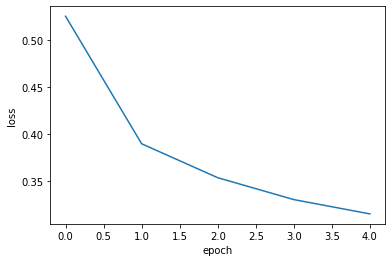

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

- 정확도 출력

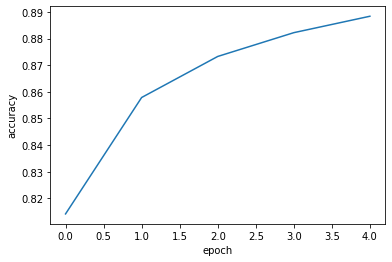

In [ ]:
plt.plot(history.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

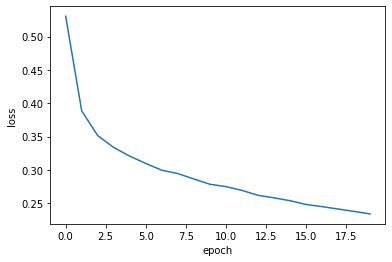

In [ ]:
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')

history = model.fit(train_scaled, train_target, epochs=20, verbose=0)
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

- 검증손실

Epoch 1/10
1500/1500 [==============================] - 7s 4ms/step - loss: 0.5274 - accuracy: 0.8118 - val_loss: 0.4030 - val_accuracy: 0.8554
Epoch 2/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3880 - accuracy: 0.8618 - val_loss: 0.4002 - val_accuracy: 0.8574
Epoch 3/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3517 - accuracy: 0.8735 - val_loss: 0.3739 - val_accuracy: 0.8672
Epoch 4/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3322 - accuracy: 0.8826 - val_loss: 0.3538 - val_accuracy: 0.8768
Epoch 5/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3195 - accuracy: 0.8872 - val_loss: 0.3701 - val_accuracy: 0.8774
Epoch 6/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3066 - accuracy: 0.8906 - val_loss: 0.3529 - val_accuracy: 0.8789
Epoch 7/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2964 - accuracy: 0.8941 - val_loss: 0.3622 - val_accuracy:

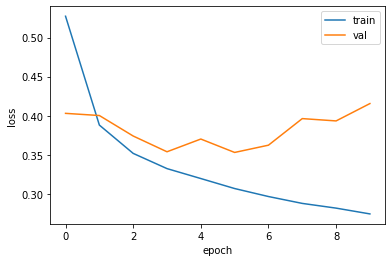

In [ ]:
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')

history = model.fit(train_scaled, train_target, epochs=10, verbose=1, 
                    validation_data=(val_scaled, val_target))

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

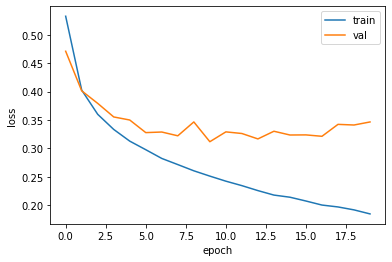

In [ ]:
model = model_fn()
model.compile(optimizer = 'adam', loss='sparse_categorical_crossentropy', metrics='accuracy')


# 과적합이 일어나는지 확인하는 코드
history = model.fit(train_scaled, train_target, epochs=20, verbose=0, 
                    validation_data=(val_scaled, val_target))

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

# 드롭아웃

- 제프리 힌턴
- 기본적으로는 모든 파라미터를 연산하는 것이 원칙
  + 그런데, 일부 뉴런에서 출력이 없는 뉴런 발생
  + 기본 일부 뉴런은 계산에서 제외 시킴
- 인공신경망 (뇌과학)
  + 값이 쏠림 현상 -> 뇌에 피가 고인 현상과 비슷함 = 뇌출혈

In [ ]:
model = model_fn(keras.layers.Dropout(0.3))
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_10 (Flatten)        (None, 784)               0         
                                                                 
 dense_18 (Dense)            (None, 100)               78500     
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                                 
 dense_19 (Dense)            (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


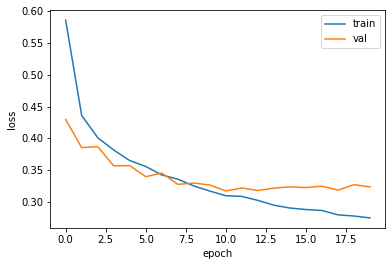

In [ ]:
model.compile(optimizer = 'adam', loss='sparse_categorical_crossentropy', metrics='accuracy')


# 과적합이 일어나는지 확인하는 코드
history = model.fit(train_scaled, train_target, epochs=20, verbose=0, 
                    validation_data=(val_scaled, val_target))

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

# 모델 저장과 복원

- 개발자 : 정확도는 중요하지 않음
  + 딥러닝 모델을 활용해서 웹앱을 개발
- 분석가 & 머신러닝 엔지니어 : 캐글 대회 (정확도 검증 필수)

- 모델 저장

In [ ]:
model.save_weights('model-weights.h5')
model.save('model-whole.h5')

- 모델 불러오기

In [ ]:
model = model_fn(keras.layers.Dropout(0.3))
model.load_weights('model-weights.h5')

In [ ]:
import numpy as np

val_labels = np.argmax(model.predict(val_scaled), axis=-1)
print(np.mean(val_labels == val_target))

0.8864166666666666


# 콜백

- p.408

In [ ]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', 
              metrics='accuracy')

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5', 
                                                save_best_only=True)

model.fit(train_scaled, train_target, epochs=20, verbose=0, 
          validation_data=(val_scaled, val_target),
          callbacks=[checkpoint_cb])

- EarlyStopping
  + 조기 종료
  + 에포크를 많이 주면 많이 줄수록 성능 (가중치 업데이터 / 기울기가 계속 미분)이 좋아야 하는 것이 원리
  + 에포크 100 / 50 에포크 시점과 90 에포크 시점 성능 차이가 없음
  + 성능 개선이 없는 시점에선 더이상 실행 할 필요가 없음

In [ ]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', 
              metrics='accuracy')

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5', 
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2,
                                                  restore_best_weights=True)

history = model.fit(train_scaled, train_target, epochs=20, verbose=0, 
                    validation_data=(val_scaled, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

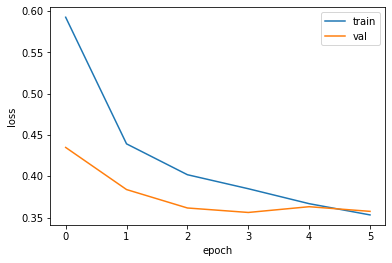

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()